<div style="background-color:#CDC997; color:#19180F; font-size:40px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Table of Contents 
</div>
<div style="background-color:#F7F7D8; color:#19180F; font-size:20px; font-family:Arial; padding:10px; border: 5px solid #19180F;"> 
1. Data Preprocessing<br>
2. Feature Engineering<br>
3. Exploratory Data Analysis<br>
4. Model Selection<br>
5. Hyperparameter tuning<br>
6. Feature importances<br>
7. Model interpretation<br>
8. Generating submission<br>
</div>

<div style="background-color:#F7F7D8; color:#19180F; font-size:20px; font-family:Arial; padding:10px; border: 5px solid #19180F;"> 
1. Data Preprocessing<br>
</div>

<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Importing modules</div>

In [1]:
!pip install seaborn xgboost lightgbm catboost --quiet

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectFromModel

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV


<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Reading the datasets</div>

In [3]:
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Checking the columns of the dataset</div>

In [4]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Importing modules</div>

In [5]:
# Check for missing values
train_df.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Handling missing values</div>

In [6]:
# Handle missing values by filling them with appropriate values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Cabin'].fillna('Unknown', inplace=True)


In [7]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


<div style="background-color:#F7F7D8; color:#19180F; font-size:20px; font-family:Arial; padding:10px; border: 5px solid #19180F;"> 
2. Feature Engineering<br>
</div>

<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Creating new features - FamilySize</div>

In [8]:
# Family Size
train_df['FamilySize'] = train_df['PassengerId'].apply(lambda x: int(x.split('_')[0]))
test_df['FamilySize'] = test_df['PassengerId'].apply(lambda x: int(x.split('_')[0]))


<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Creating new features - Cabin Class</div>

In [9]:
# Cabin Class
train_df['CabinClass'] = train_df['Cabin'].str[0]
test_df['CabinClass'] = test_df['Cabin'].str[0]


<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Creating new features - Age Category</div>

In [10]:
# Age Category
train_df['AgeCategory'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 60, float('inf')], labels=['Child', 'Teenager', 'Adult', 'Elderly'])
test_df['AgeCategory'] = pd.cut(test_df['Age'], bins=[0, 12, 18, 60, float('inf')], labels=['Child', 'Teenager', 'Adult', 'Elderly'])


<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Performing sanity check of the dataframe</div>

In [11]:
# Verify the updated DataFrame
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,FamilySize,CabinClass,AgeCategory
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,Adult
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,F,Adult
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,A,Adult
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,A,Adult
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,F,Teenager


In [12]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,FamilySize,CabinClass,AgeCategory
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,G,Adult
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,F,Adult
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,C,Adult
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,C,Adult
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,F,Adult


<div style="background-color:#F7F7D8; color:#19180F; font-size:20px; font-family:Arial; padding:10px; border: 5px solid #19180F;"> 
3. Exploratory Data Analysis<br>
</div>

<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Defining the function to perform EDA</div>

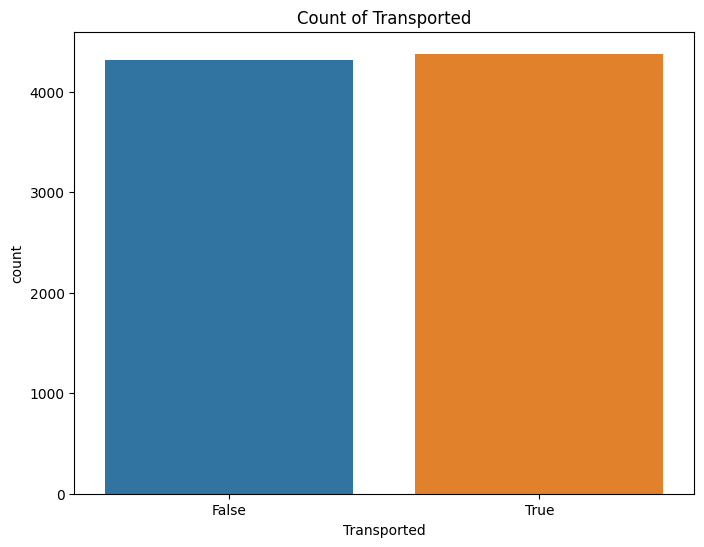

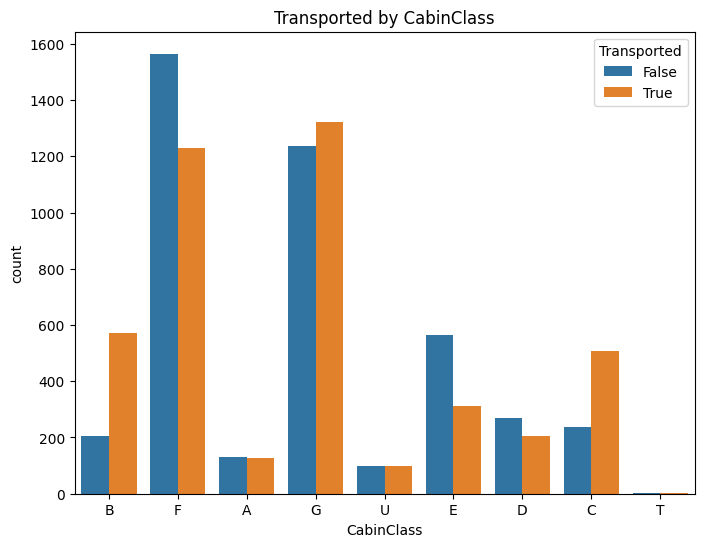

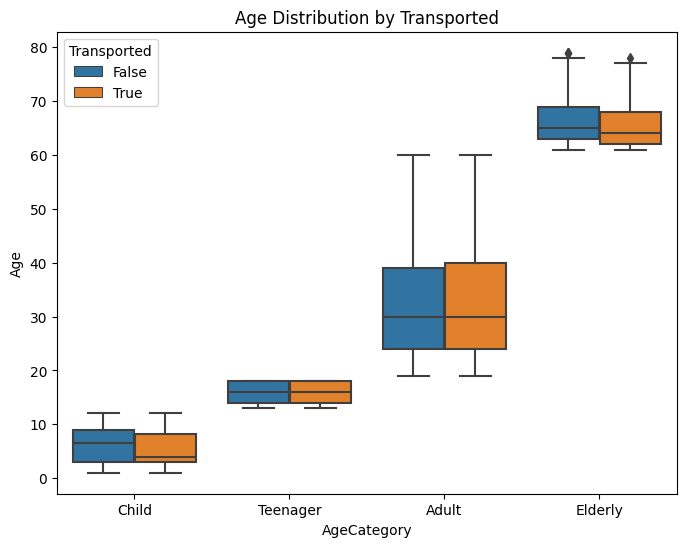

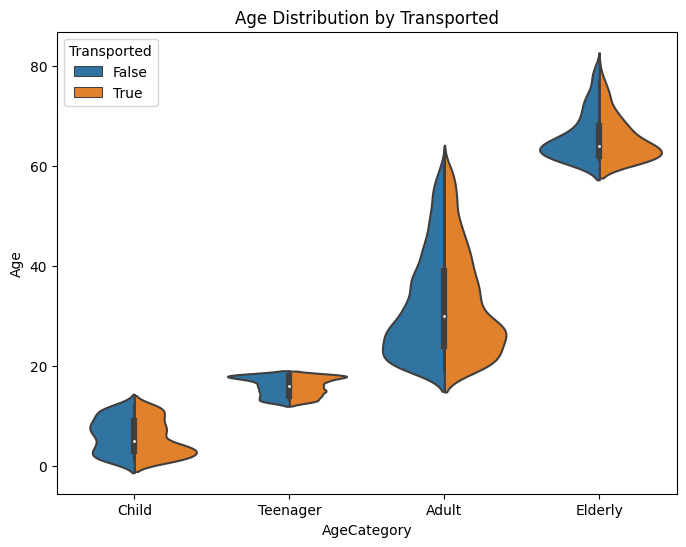

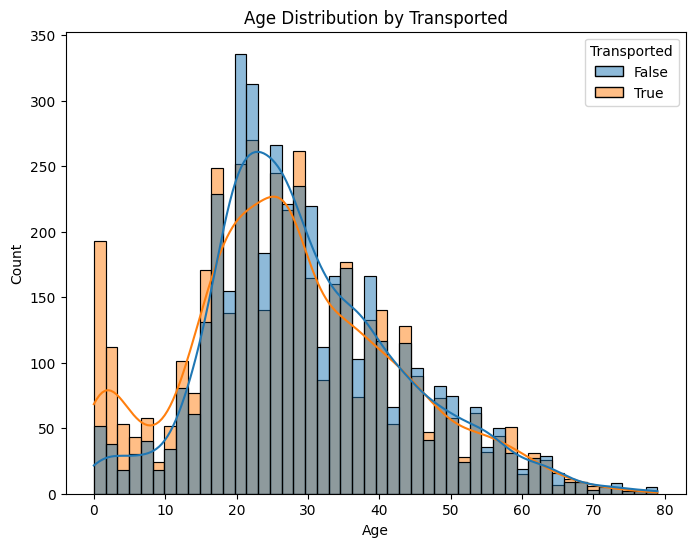

<Figure size 1000x800 with 0 Axes>

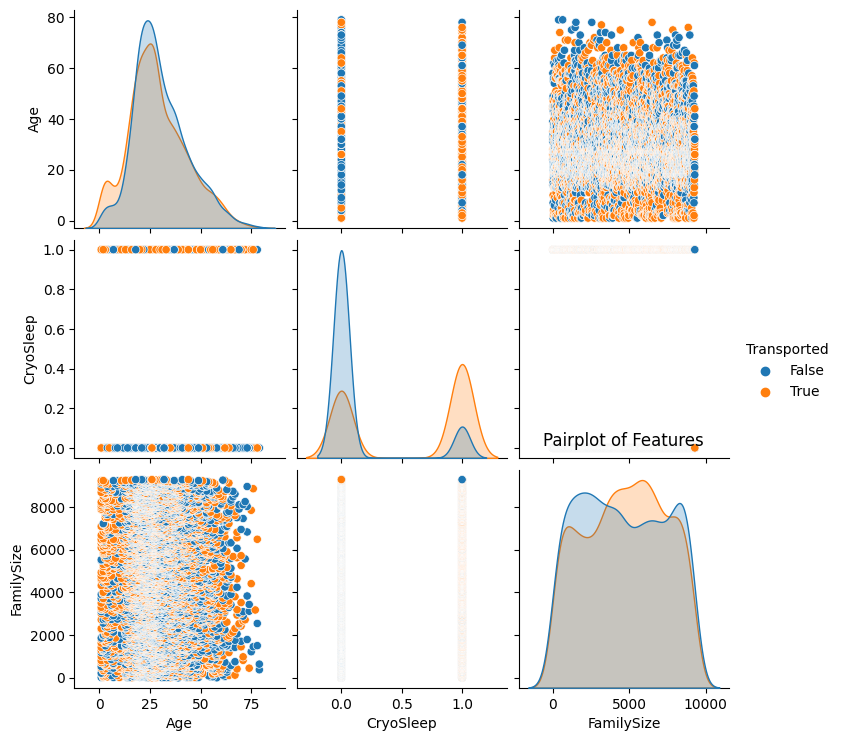

In [13]:

def perform_eda(data):
    # Countplot for Transported
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Transported', data=data)
    plt.title('Count of Transported')
    plt.show()

    # Bar plot for CabinClass
    plt.figure(figsize=(8, 6))
    sns.countplot(x='CabinClass', hue='Transported', data=data)
    plt.title('Transported by CabinClass')
    plt.show()

    # Box plot for AgeCategory
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='AgeCategory', y='Age', hue='Transported', data=data)
    plt.title('Age Distribution by Transported')
    plt.show()

    # Violin plot for AgeCategory
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='AgeCategory', y='Age', hue='Transported', data=data, split=True)
    plt.title('Age Distribution by Transported')
    plt.show()

    # Histogram of Age
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x='Age', hue='Transported', kde=True)
    plt.title('Age Distribution by Transported')
    plt.show()

    # Remove rows with missing values
    data_cleaned = data.dropna()

    # Pairplot
    plt.figure(figsize=(10, 8))
    sns.pairplot(data=data_cleaned, vars=['Age', 'CryoSleep', 'FamilySize'], hue='Transported', diag_kind='kde')
    plt.title('Pairplot of Features')
    plt.show()


perform_eda(train_df)


<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Performing EDA</div>

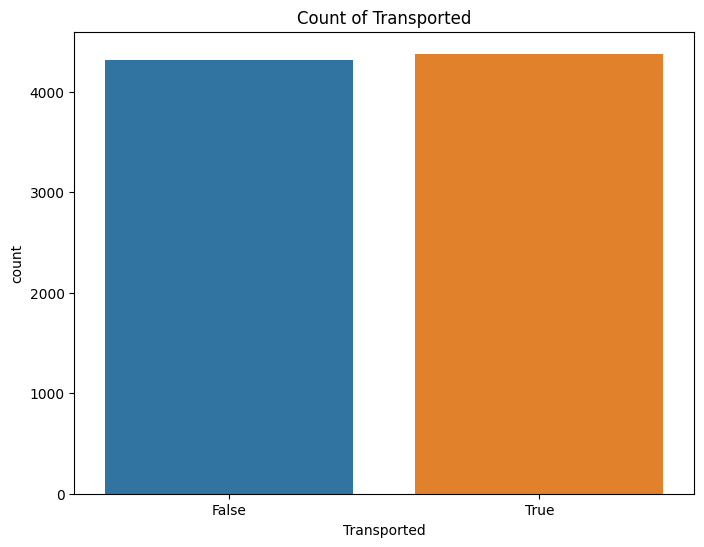

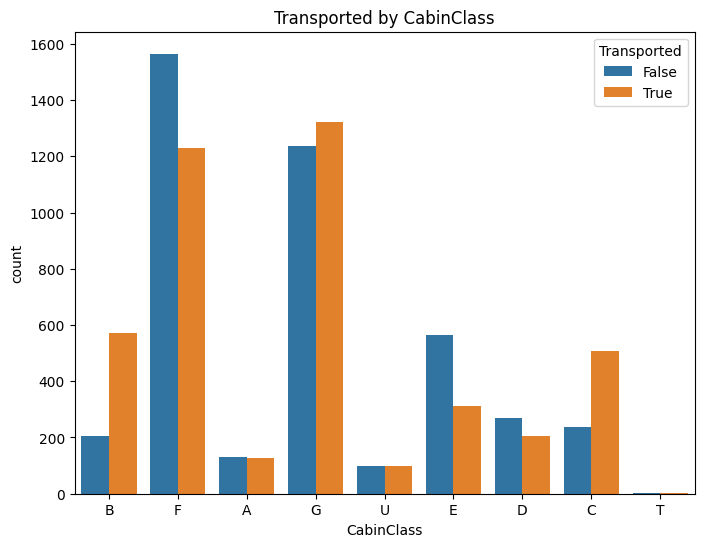

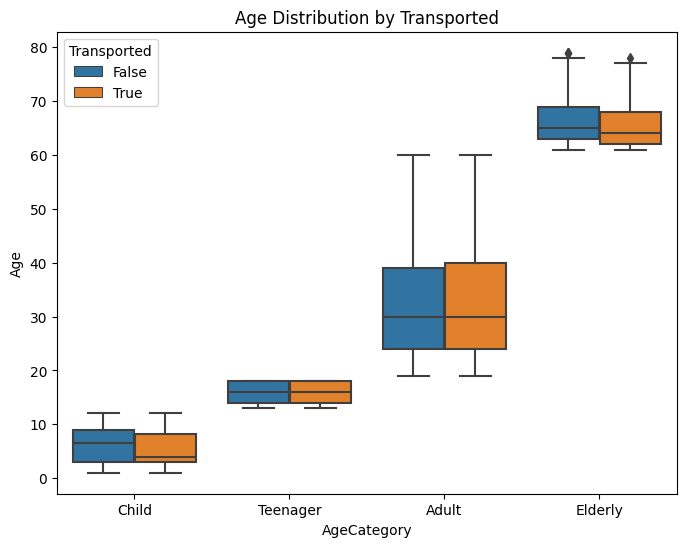

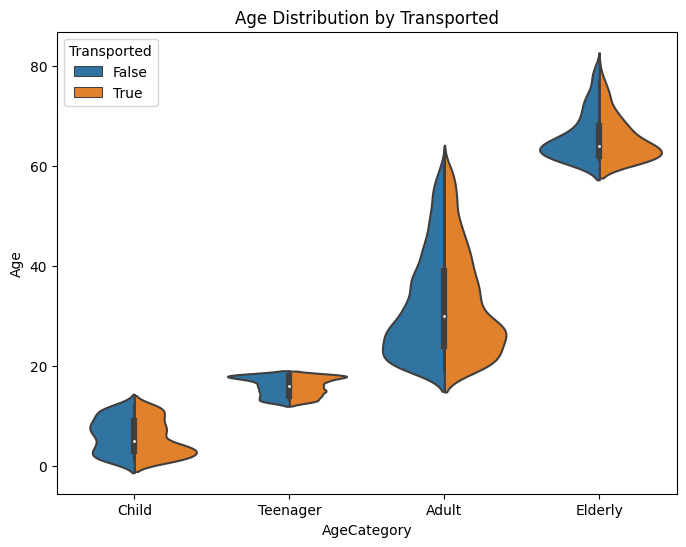

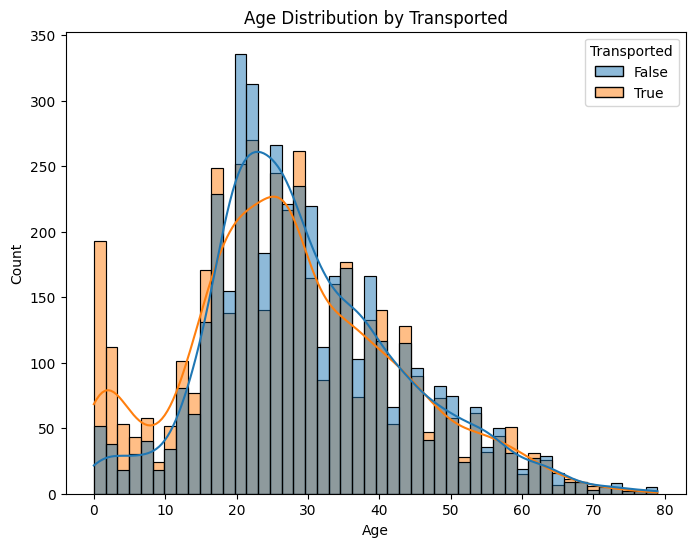

<Figure size 1000x800 with 0 Axes>

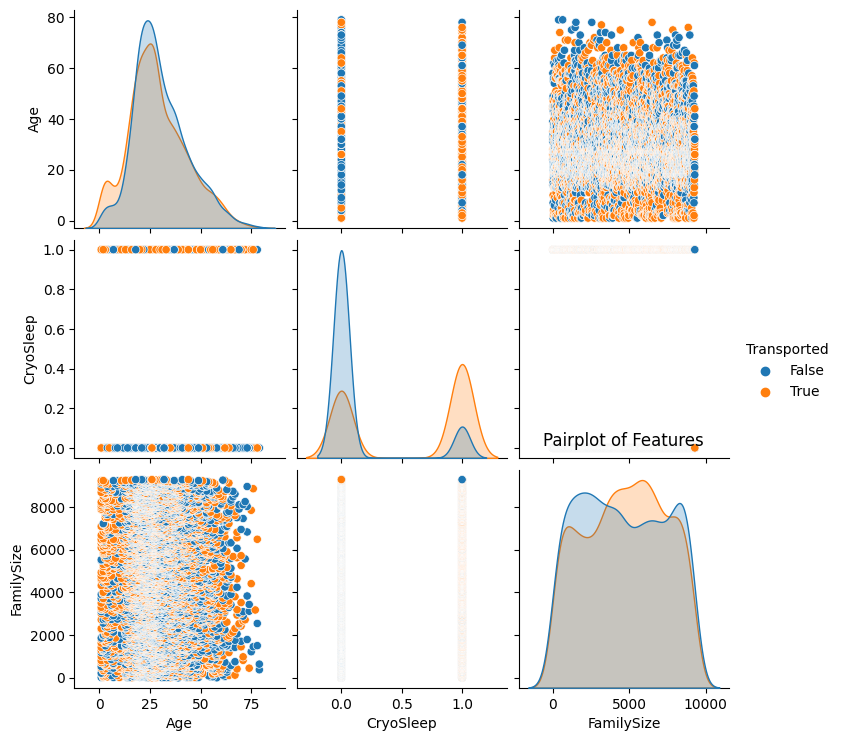

In [14]:
perform_eda(train_df)

<div style="background-color:#F7F7D8; color:#19180F; font-size:20px; font-family:Arial; padding:10px; border: 5px solid #19180F;"> 
4. Model Selection<br>
</div>

<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Defining function to perform model selection</div>

In [15]:
def perform_model_selection(X, y):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the classifiers
    classifiers = [
        LogisticRegression(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        BaggingClassifier(),
        GradientBoostingClassifier(),
        SVC(),
        KNeighborsClassifier(),
        GaussianNB()    ]

    # Define the ensemble methods
    voting_classifier = VotingClassifier(estimators=[('clf{}'.format(i), clf) for i, clf in enumerate(classifiers)], voting='hard')
    xgb_classifier = XGBClassifier()
    lgbm_classifier = LGBMClassifier()
    catboost_classifier = CatBoostClassifier()

    # Evaluate each classifier using cross-validation
    results = []
    names = []
    for clf in classifiers + [voting_classifier, xgb_classifier, lgbm_classifier, catboost_classifier]:
        cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy',verbose=3)
        results.append(cv_scores)
        names.append(type(clf).__name__)
        print('%s: %.4f (%.4f)' % (type(clf).__name__, cv_scores.mean(), cv_scores.std()))

    # Boxplot of cross-validation results
    plt.figure(figsize=(10, 6))
    plt.boxplot(results, labels=names)
    plt.title('Cross-Validation Results')
    plt.show()


<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Creating X and y out of the dataframe</div>

In [16]:
# Define the features (X) and target variable (y)
X = train_df.drop('Transported', axis=1)  # Drop the target variable from the features
y = train_df['Transported']

<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Handling categorical variables</div>

In [17]:
# Perform one-hot encoding on categorical variables
X = pd.get_dummies(train_df.drop('Transported', axis=1))

# Define the target variable (y)
y = train_df['Transported']


<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Performing imputation to handle NaN values</div>

In [18]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Performing model selection</div>

In [19]:
# Perform model selection
perform_model_selection(X_imputed, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................ score: (test=0.781) total time=  10.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.7s remaining:    0.0s


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................ score: (test=0.786) total time=   9.8s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.5s remaining:    0.0s


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................ score: (test=0.783) total time=   9.9s


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................ score: (test=0.784) total time=   9.8s


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................ score: (test=0.804) total time=   9.6s
LogisticRegression: 0.7875 (0.0082)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   49.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.776) total time=  35.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.6s remaining:    0.0s


[CV] END ................................ score: (test=0.772) total time=  35.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV] END ................................ score: (test=0.777) total time=  35.2s


[CV] END ................................ score: (test=0.786) total time=  43.0s


[CV] END ................................ score: (test=0.796) total time=  35.1s
RandomForestClassifier: 0.7814 (0.0087)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.784) total time=  49.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   49.5s remaining:    0.0s


[CV] END ................................ score: (test=0.794) total time=  49.6s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s


[CV] END ................................ score: (test=0.791) total time=  51.9s


[CV] END ................................ score: (test=0.783) total time=  52.4s


[CV] END ................................ score: (test=0.812) total time=  49.6s
AdaBoostClassifier: 0.7928 (0.0103)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.784) total time=  18.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.8s remaining:    0.0s


[CV] END ................................ score: (test=0.789) total time=  17.7s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   36.6s remaining:    0.0s


[CV] END ................................ score: (test=0.799) total time=  17.2s


[CV] END ................................ score: (test=0.784) total time=  18.9s


[CV] END ................................ score: (test=0.796) total time=  18.5s
BaggingClassifier: 0.7906 (0.0061)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.792) total time= 1.5min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[CV] END ................................ score: (test=0.801) total time= 1.5min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.1min remaining:    0.0s


[CV] END ................................ score: (test=0.794) total time= 1.5min


[CV] END ................................ score: (test=0.797) total time= 1.5min


[CV] END ................................ score: (test=0.813) total time= 1.5min
GradientBoostingClassifier: 0.7994 (0.0074)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.769) total time=12.0min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.0min remaining:    0.0s


[CV] END ................................ score: (test=0.783) total time=11.3min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 23.3min remaining:    0.0s


[CV] END ................................ score: (test=0.769) total time=11.5min


[CV] END ................................ score: (test=0.770) total time=11.5min


[CV] END ................................ score: (test=0.799) total time=11.6min
SVC: 0.7778 (0.0120)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 57.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.758) total time=   3.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] END ................................ score: (test=0.764) total time=   3.6s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


[CV] END ................................ score: (test=0.740) total time=   3.4s


[CV] END ................................ score: (test=0.737) total time=   3.4s


[CV] END ................................ score: (test=0.757) total time=   3.5s
KNeighborsClassifier: 0.7511 (0.0108)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.758) total time=   4.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV] END ................................ score: (test=0.770) total time=   3.9s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.2s remaining:    0.0s


[CV] END ................................ score: (test=0.734) total time=   3.8s


[CV] END ................................ score: (test=0.746) total time=   3.8s


[CV] END ................................ score: (test=0.763) total time=   3.8s
GaussianNB: 0.7541 (0.0129)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................ score: (test=0.798) total time=15.9min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 15.9min remaining:    0.0s


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................ score: (test=0.802) total time=15.4min


<div style="background-color:#F7F7D8; color:#19180F; font-size:20px; font-family:Arial; padding:10px; border: 5px solid #19180F;"> 
5. Hyperparameter tuning<br>
</div>

<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Defining funciton for performing hyperparameter tuning</div>

In [ ]:

def perform_hyperparam_tuning(X, y):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the classifiers
    classifiers = [
        LogisticRegression(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        BaggingClassifier(),
        GradientBoostingClassifier(),
        SVC(),
        KNeighborsClassifier(),
        GaussianNB(),
    ]

    # Define the ensemble methods
    voting_classifier = VotingClassifier(estimators=[('clf{}'.format(i), clf) for i, clf in enumerate(classifiers)], voting='hard')
    xgb_classifier = XGBClassifier()
    lgbm_classifier = LGBMClassifier()
    catboost_classifier = CatBoostClassifier()

    # Define the parameter grids for hyperparameter tuning
    param_grid = [
        {
            'C': [1],
            'penalty': ['l1', 'l2']
        },
        {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10]
        },
        {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.1, 0.5, 1.0]
        },
        {
            'n_estimators': [10, 20, 30]
        },
        {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.1, 0.5, 1.0]
        },
        {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        },
        {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        },
        None,
        None
    ]

    # Define the parameter names for printing the best parameters
    param_names = [
        'LogisticRegression',
        'RandomForestClassifier',
        'AdaBoostClassifier',
        'BaggingClassifier',
        'GradientBoostingClassifier',
        'SVC',
        'KNeighborsClassifier',
        'GaussianNB',
        'LinearDiscriminantAnalysis',
        'VotingClassifier',
        'XGBClassifier',
        'LGBMClassifier',
        'CatBoostClassifier'
    ]

    # Perform hyperparameter tuning and cross-validation for each classifier
    best_params = []
    best_scores = []
    for clf, param, name in zip(classifiers + [voting_classifier, xgb_classifier, lgbm_classifier, catboost_classifier], param_grid, param_names):
        if param is not None:
            grid_search = GridSearchCV(clf, param_grid=param, cv=5, scoring='accuracy', verbose=3)
            grid_search.fit(X_train, y_train)
            best_params.append(grid_search.best_params_)
            clf.set_params(**grid_search.best_params_)

        cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy', verbose=1)
        best_scores.append(cv_scores.mean())
        print('%s: %.4f (%.4f)' % (name, cv_scores.mean(), cv_scores.std()))

    # Find the best model based on cross-validation scores
    best_model_idx = np.argmax(best_scores)
    best_model = classifiers[best_model_idx]
    best_model_name = param_names[best_model_idx]

    print("Best model based on cross-validation: %s" % best_model_name)

    # Print the best parameters for the best model
    print("Best parameters for the best model:")
    print(best_params[best_model_idx])

    # Boxplot of cross-validation results
    plt.figure(figsize=(10, 6))
    plt.boxplot(results, labels=param_names)
    plt.title('Cross-Validation Results')
    plt.show()
    
    return best_model,best_model_name, best_params[best_model_idx]


<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Performing hyperparameter tuning and extracting best model and its configs</div>

In [ ]:
best_model,best_model_name, best_params= perform_hyperparam_tuning(X_imputed,y)

<div style="background-color:#F7F7D8; color:#19180F; font-size:20px; font-family:Arial; padding:10px; border: 5px solid #19180F;"> 
6. Feature Importances<br>
</div>

<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Extracting feature importances from the best model</div>

In [ ]:
# Get feature importance
feature_importance = best_model.feature_importances_

<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Sorting the feature importance list</div>

In [ ]:
# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]


<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Displaying sorted feature importance</div>

In [ ]:
# Get the feature names
feature_names = X.columns

# Print the feature importances
print("Feature Importance:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {feature_importances[i]}")

<div style="background-color:#F7F7D8; color:#19180F; font-size:20px; font-family:Arial; padding:10px; border: 5px solid #19180F;"> 
7. Model Interpretation<br>
</div>

<div style="background-color:#CDC997; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Creating shap explainer object and obtaining the plot.<br>

In a SHAP summary plot, the colors represent the feature values that contribute to either increasing or decreasing the prediction compared to the base value. The key aspects of the colors in the plot are:<br>
<br>
1. Red: Features with high values that have a positive impact on the prediction. The darker the shade of red, the higher the feature value and the stronger its positive impact on the prediction.<br>
<br>
2. Blue: Features with low values that have a negative impact on the prediction. The darker the shade of blue, the lower the feature value and the stronger its negative impact on the prediction.<br>
<br>
3. White: Indicates a feature value close to the base value, which has a minimal impact on the prediction.<br>
<br>
The plot displays the distribution of feature importance based on SHAP values. Each feature is represented by a vertical bar, and the length of the bar indicates the magnitude of the SHAP value. The colors within the bars provide information about the direction and magnitude of the impact of each feature on the model's predictions.<br>

By examining the plot, we can gain insights into which features have the most significant influence on the model's predictions and understand the relationship between the feature values and the predicted outcome.    <br>

</div>

In [ ]:
# Perform model interpretation 
explainer = shap.Explainer(best_model)
shap_values = explainer(X)

# Visualize the SHAP values
shap.summary_plot(shap_values, X)

<div style="background-color:#F7F7D8; color:#19180F; font-size:20px; font-family:Arial; padding:10px; border: 5px solid #19180F;"> 
8. Generating submission <br>
</div>

<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Performing prediction on test dataframe</div>

In [ ]:
# Perform predictions on the test dataset
predictions = best_model.predict(test_df)



<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Creating submission dataframe</div>

In [ ]:
# Create a submission dataframe
submission_df = pd.DataFrame({'Prediction': predictions})



<div style="background-color:#CDC997; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 
Writing dataframe to csv</div>

In [ ]:
# Save the submission dataframe to a CSV file
submission_df.to_csv('submission.csv', index=False)